<a href="https://colab.research.google.com/github/Maziko-M98/Data_Science/blob/Car_Insurance/Car_Insurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from typing import Tuple, List
from math import ceil

In [3]:
from google.colab import files


# Upload file to Colab
uploaded = files.upload()

# Read CSV file into a Pandas dataframe
dataframe = pd.read_csv('train.csv')



Saving train.csv to train.csv


In [4]:
dataframe.head(15)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
5,6,Female,24,1,33.0,0,< 1 Year,Yes,2630.0,160.0,176,0
6,7,Male,23,1,11.0,0,< 1 Year,Yes,23367.0,152.0,249,0
7,8,Female,56,1,28.0,0,1-2 Year,Yes,32031.0,26.0,72,1
8,9,Female,24,1,3.0,1,< 1 Year,No,27619.0,152.0,28,0
9,10,Female,32,1,6.0,1,< 1 Year,No,28771.0,152.0,80,0


In [5]:
Target_Variable = 'Response'

In [6]:
len(dataframe)

381109

In [7]:
len(dataframe)*len(dataframe.columns)

4573308

In [8]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [9]:
dataframe.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,381109.0,190555.000000,110016.836208,1.0,95278.0,190555.0,285832.0,381109.0
Age,381109.0,38.822584,15.511611,20.0,25.0,36.0,49.0,85.0
Driving_License,381109.0,0.997869,0.046110,0.0,1.0,1.0,1.0,1.0
Region_Code,381109.0,26.388807,13.229888,0.0,15.0,28.0,35.0,52.0
Previously_Insured,381109.0,0.458210,0.498251,0.0,0.0,0.0,1.0,1.0
Annual_Premium,381109.0,30564.389581,17213.155057,2630.0,24405.0,31669.0,39400.0,540165.0
Policy_Sales_Channel,381109.0,112.034295,54.203995,1.0,29.0,133.0,152.0,163.0
Vintage,381109.0,154.347397,83.671304,10.0,82.0,154.0,227.0,299.0
Response,381109.0,0.122563,0.327936,0.0,0.0,0.0,0.0,1.0


In [10]:
dataframe = dataframe.replace('Yes', 1)
dataframe = dataframe.replace('No', 0)

In [11]:
dataframe.head(5)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,1,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,0,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,1,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,0,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,0,27496.0,152.0,39,0


In [12]:
dataframe = dataframe.replace('Male', 1)
dataframe = dataframe.replace('Female', 0)

In [13]:
dataframe.head(5)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,1,44,1,28.0,0,> 2 Years,1,40454.0,26.0,217,1
1,2,1,76,1,3.0,0,1-2 Year,0,33536.0,26.0,183,0
2,3,1,47,1,28.0,0,> 2 Years,1,38294.0,26.0,27,1
3,4,1,21,1,11.0,1,< 1 Year,0,28619.0,152.0,203,0
4,5,0,29,1,41.0,1,< 1 Year,0,27496.0,152.0,39,0


In [14]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  int64  
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  int64  
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 34.9+ MB


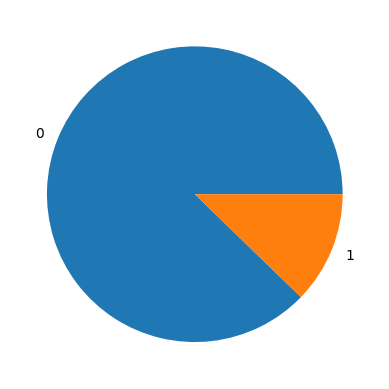

In [15]:
# Extract the data to plot
counts = dataframe['Response'].value_counts()

# Create the pie chart
plt.pie(counts, labels=counts.index)

# Display the pie chart
plt.show()


In [16]:
Num_Response_0 = len(dataframe[dataframe['Response'] == 0])
Num_Response_1 = len(dataframe[dataframe['Response'] == 1])

In [17]:
print(Num_Response_0)

334399


In [18]:
print(Num_Response_1)

46710


In [19]:
import seaborn as sns

<ipython-input-20-bbe0ce64352a>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataframe.corr(),


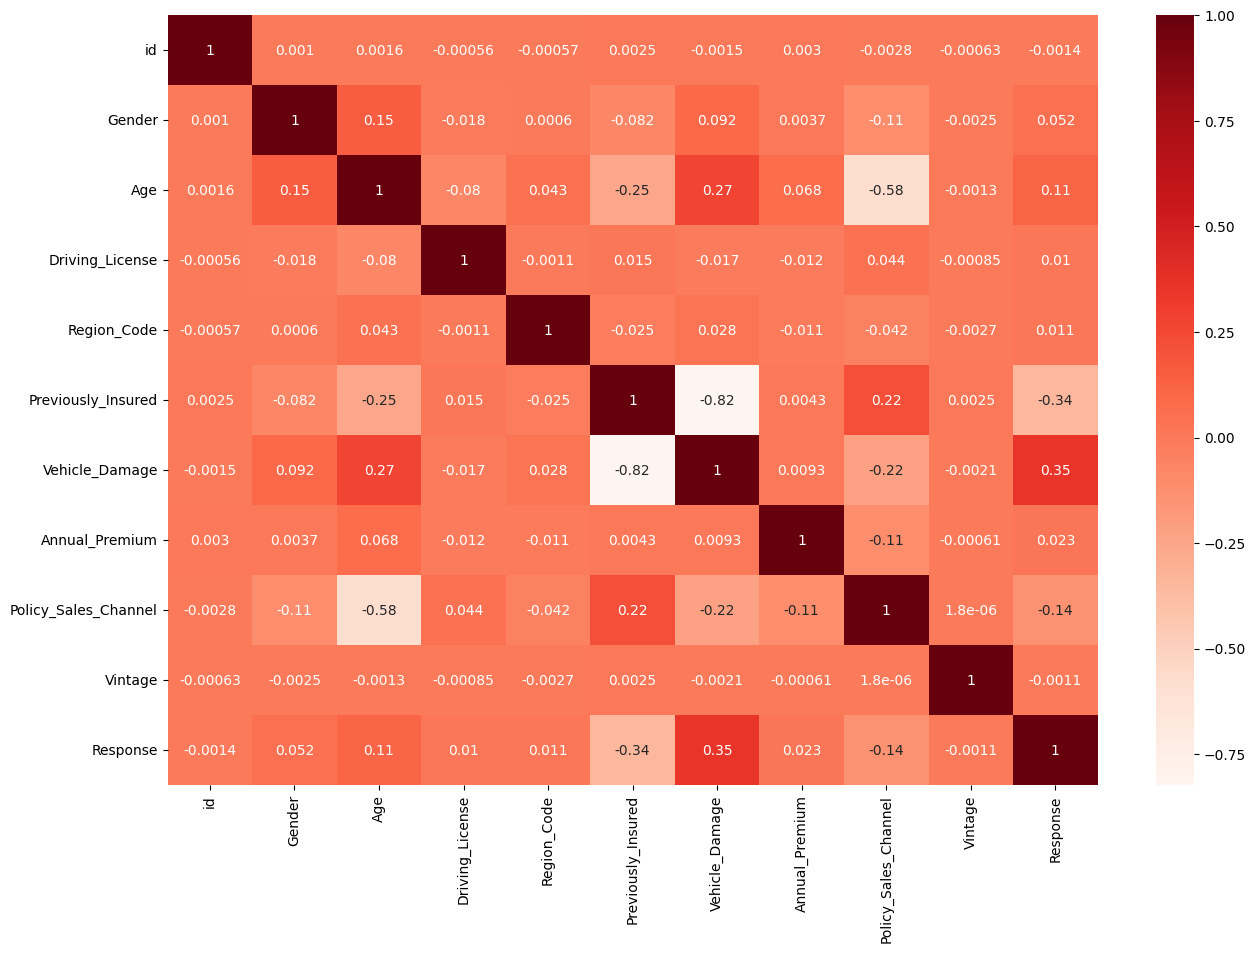

In [20]:
plt.figure(figsize=(15, 10))
_ = sns.heatmap(
  dataframe.corr(),
  annot=True,
  fmt='.2g',
  cmap='Reds',
)

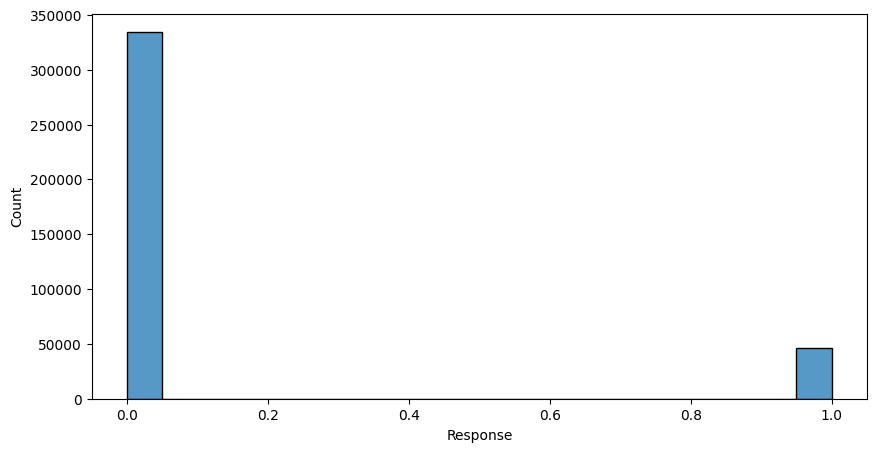

In [21]:
plt.figure(figsize=(10, 5))
_ = sns.histplot(data=dataframe, x=Target_Variable)

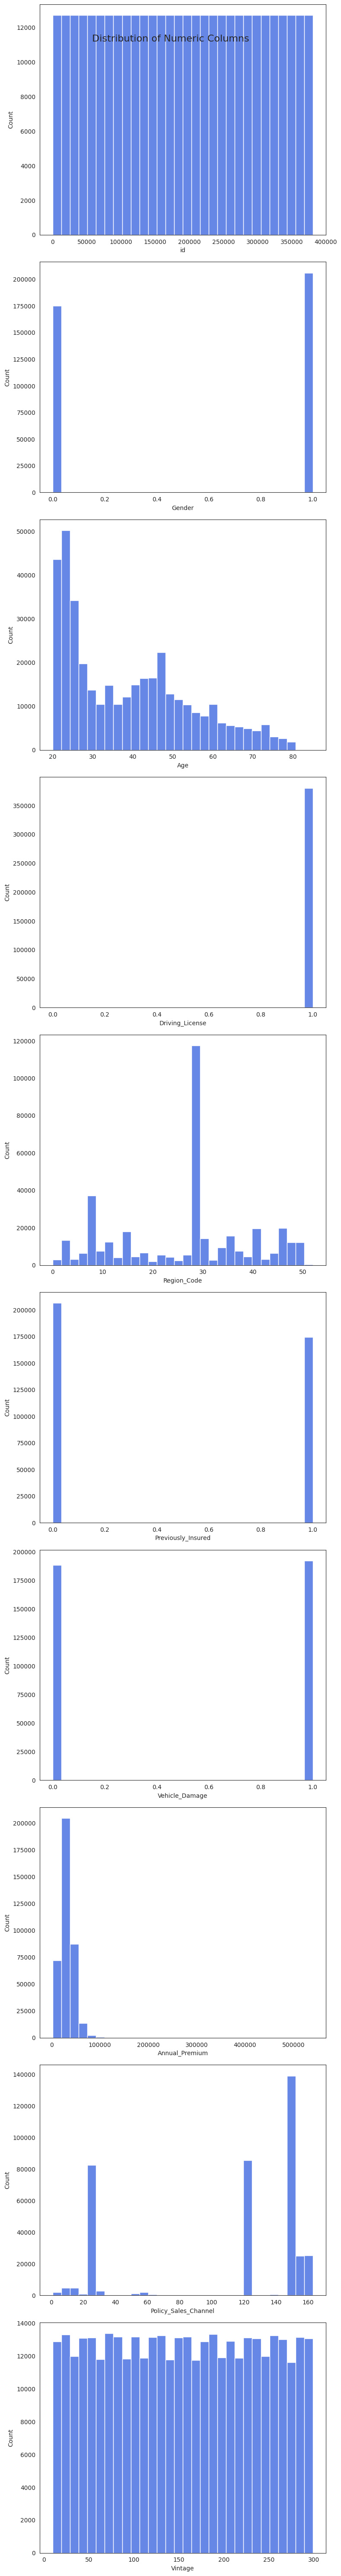

In [22]:
# Get a list of all numeric columns in the DataFrame, except for the target variable
columns_to_plot = [col for col in dataframe.select_dtypes(include=np.number).columns if col != Target_Variable]

# Set the style of the plot
sns.set_style('white')

# Create a grid of subplots for each numeric column
fig, axes = plt.subplots(nrows=len(columns_to_plot), ncols=1, figsize=(8, 6 * len(columns_to_plot)))

# Loop over each subplot and plot the corresponding column
for i, col in enumerate(columns_to_plot):
    sns.histplot(dataframe[col], ax=axes[i], color='royalblue', alpha=0.8, bins=30)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

# Set the title of the plot
fig.suptitle('Distribution of Numeric Columns', fontsize=16)

# Adjust the spacing between subplots
plt.tight_layout()

In [23]:
len(dataframe)

381109

In [40]:
!git config --global user.email "mazikomphepo@gmail.com"
!git config --global user.name "Maziko-M98"
!git config --global credential.helper store


In [41]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [42]:
cd /content/drive


/content/drive


In [43]:
%cd /content/drive/MyDrive/



/content/drive/MyDrive


In [44]:
!mkdir my-git-repo


mkdir: cannot create directory ‘my-git-repo’: File exists


In [45]:
%cd my-git-repo


/content/drive/MyDrive/my-git-repo


In [46]:
!git init


Reinitialized existing Git repository in /content/drive/MyDrive/my-git-repo/.git/


In [48]:
!git add .



In [49]:
!git commit -m "The initial data preprocessing showing a non-linear relationship among the variables"


On branch master

Initial commit

nothing to commit (create/copy files and use "git add" to track)
